# Compare Holo Lens 2 with UR-Walking-Measurement

### 1. Display Overlap of both Datasets

In [12]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np



In [6]:
holo_lens_data = pd.read_csv('')
ur_xml_data = pd.read_csv('')
ur_xml_data = ur_xml_data.drop(columns=['Unnamed: 0'])

ur_xml_data = ur_xml_data.drop(columns=['x','y','x_shifted','y_shifted','xgps','ygps'])
ur_xml_data=ur_xml_data.rename(columns={'x_neu': 'x'})
ur_xml_data=ur_xml_data.rename(columns={'y_neu': 'y'})


ur_xml_data['x'] = round(-ur_xml_data['x'], 2) + 36.02
ur_xml_data['y'] = round(-ur_xml_data['y'], 2) + 50.32

holo_lens_data['x'] = round(holo_lens_data['x'],2)+2.65
holo_lens_data['y'] = round(holo_lens_data['y'],2)+1.96



In [7]:
fig = make_subplots(rows=1, cols=1)

# Scatter plot  ur_xml_data
scatter_trace_ur_xml = go.Scatter(
    x=ur_xml_data['x'],
    y=ur_xml_data['y'],
    mode='markers',
    marker=dict(color='blue', size=8),
    name='Scatter UR Walking XML Tool'
)

# Scatter plot holo_lens_data
scatter_trace_holo_lens = go.Scatter(
    x=holo_lens_data['x'],
    y=holo_lens_data['y'],
    mode='markers',
    marker=dict(color='red', size=8),
    name='Scatter Plot Holo Lens'  
)

fig.add_trace(scatter_trace_ur_xml)
fig.add_trace(scatter_trace_holo_lens)
fig.update_layout(
    title='Ground Visualization with Index Tags',
    xaxis_title='X ',
    yaxis_title='Y '
)

fig.show()


### Note

The reason for the shift of the points x>0 is that the doors are marked as double doors in the building plan, but are not twice as wide.

# Significance test

To see if there is a difference between the models, we compare the widths of the doors.
This allows us to see if they are significantly different.

#### Door widths

Using the annotated tags during the measurement, we know which points are doors. However, we still need to manually connect the door points to compare the length.

In [8]:
ur_doors = {
    6: 5, 12: 11, 14: 13, 18: 17, 22: 21, 26: 25, 30: 29, 38: 37,
    42: 41, 46: 45, 103: 102, 105: 104, 99: 98, 93: 92, 101: 100,
    95: 94, 91: 90, 89: 88, 85: 84, 87: 86, 83: 82, 71: 70,
    73: 72, 75: 74, 81: 80, 7:8, 9:10,15:16,19:20,23:24,27:28,31:32,97:96
}
holo_lens_doors = {
    267:256, 279:268,294:280,306:295,320:307,332:321,352:333,353:364,365:378,379:394,395:408,
    409:422,423:436,437:448,350:351,464:457,456:449,43:27,59:44,74:60,92:75,108:93,118:109,119:130,131:143,144:161,162:177,
    178:187,188:199,200:213,214:227,228:241,242:255
}

In [9]:
# Connect Doors
def update_link_value(df, row_index, value, holo):

    if 'link' not in df.columns:
        df['link'] = 0
        
    if holo:
        
        for index, row in df.iterrows():
            if row['Index'] == row_index:
                df.at[index, 'link'] = value
        
    else:
        for index, row in df.iterrows():
            if row['id'] == row_index:
                df.at[index, 'link'] = value
            

    return df

for key, value in ur_doors.items():
    ur_xml_data = update_link_value(ur_xml_data, key,value,False)

for key, value in holo_lens_doors.items():
    holo_lens_data = update_link_value(holo_lens_data, key,value,True)


#### Door List Length

In [6]:
print(len(ur_xml_data[ur_xml_data['link'] > 0]))
print(len(holo_lens_data[holo_lens_data['link'] > 0]))

33
33


### Visualize Doors

In [11]:
ur_xml_data_sort = ur_xml_data[ur_xml_data['link'] > 0]
holo_lens_data_sort = holo_lens_data[holo_lens_data['link'] > 0]

fig = make_subplots(rows=1, cols=1)

# Scatter plot  ur_xml_data
scatter_trace_ur_xml = go.Scatter(
    x=ur_xml_data_sort['x'],
    y=ur_xml_data_sort['y'],
    mode='markers+text',
    marker=dict(color='blue', size=8),
    text=ur_xml_data['id'],
    textposition='top center',
    name='Scatter UR Walking XML Tool'
)

# Scatter plot holo_lens_data
scatter_trace_holo_lens = go.Scatter(
    x=holo_lens_data_sort['x'],
    y=holo_lens_data_sort['y'],
    mode='markers',
    marker=dict(color='red', size=8),
    name='Scatter Plot Holo Lens'  # Name for the legend
)

fig.add_trace(scatter_trace_ur_xml)
fig.add_trace(scatter_trace_holo_lens)
fig.update_layout(
    title='Ground Visualization with Index Tags',
    xaxis_title='X ',
    yaxis_title='Y '
)

fig.show()

### Distance Calculation

To test for significant changes, the distances between the vectors must be calculated.

In [13]:
def calculate_distances(df_sort, df,holo):
    
    distances = []
    for index, row in df_sort.iterrows():
        x_eins = row['x']
        y_eins = row['y']
        link = row['link']
        
        if(holo):
            line = df[df['Index'] == link].iloc[0]
            x_zwei = line['x']
            y_zwei = line['y']
        
        else:
            line = df[df['id'] == link].iloc[0]
            x_zwei = line['x']
            y_zwei = line['y']
            
        
        
        distanz = np.sqrt((x_zwei - x_eins)**2 + (y_zwei - y_eins)**2)
        distances.append(distanz)
        
    return distances


xml = calculate_distances(ur_xml_data_sort,ur_xml_data,False)
holo = calculate_distances(holo_lens_data_sort,holo_lens_data,True)
print(f'xml:{xml}')
print(f'holo:{holo}')

xml:[0.9704638066409265, 1.0404326023342398, 0.9704638066409267, 0.8205485969764378, 0.6906518659932817, 0.9708243919473788, 0.830541991713843, 1.1801694793545543, 0.9704638066409267, 0.9708243919473788, 0.8205485969764378, 0.830541991713843, 0.9008884503644188, 0.6906518659932817, 0.9004998611882167, 0.830541991713843, 0.830541991713843, 1.0404326023342398, 1.0304368005850735, 1.0404326023342398, 0.9008884503644151, 0.9704638066409267, 0.7705841939723427, 1.1111255554616672, 0.8309632964216945, 0.9004998611882167, 0.7710382610480454, 0.9004998611882167, 1.1801694793545543, 1.1007270324653695, 0.830541991713843, 1.1107204868912925, 1.1007270324653695]
holo:[1.019999999999996, 0.9899999999999984, 1.0300000000000011, 1.0, 1.0000000000000018, 1.040000000000001, 1.0300000000000011, 1.0199999999999996, 1.0, 1.0199999999999996, 1.0000000000000018, 1.0199999999999996, 1.0600000000000005, 0.9700000000000002, 1.0, 1.0, 1.0300000000000011, 0.980000000000004, 0.9800000000000004, 0.989999999999998

## Statistics

Check the differences between different measurement methods

In [14]:
import statistics

print(f"XML:{statistics.mean(xml)}")
print(f"holo:{statistics.mean(holo)}")

XML:0.933631842554039
holo:1.0064003902460525


### Visualisation Holo Lens measurements

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

#### Boxplot

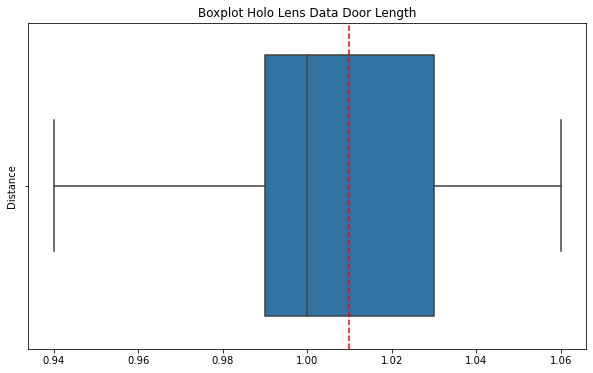

In [17]:
zahlen_liste = holo

plt.figure(figsize=(10, 6))
sns.boxplot(x=zahlen_liste, orient='h') 
plt.title("Boxplot Holo Lens Data Door Length")
plt.ylabel("Distance")
plt.axvline(x=1.01, color='red', linestyle='--')


plt.show()

### Visualisation XML tool

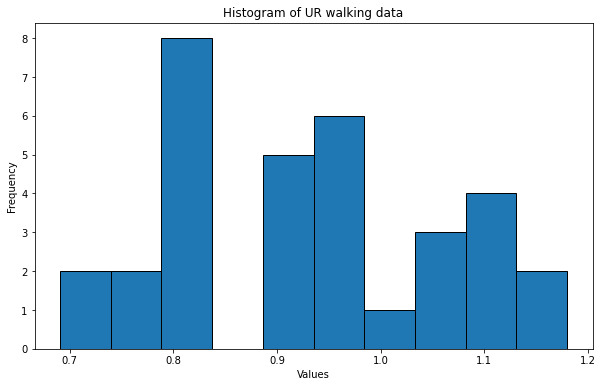

/Users/noahmeissner/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



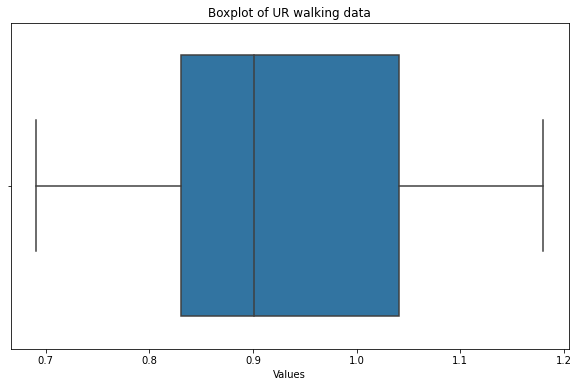

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics


zahlen_liste = xml

# Histogramm
plt.figure(figsize=(10, 6))
plt.hist(zahlen_liste, bins=10, edgecolor='black')
plt.title("Histogram of UR walking data")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(zahlen_liste)
plt.title("Boxplot of UR walking data")
plt.xlabel("Values")
plt.show()

### Check if there is a significant difference between XML TOOL and Holo Lens

In [20]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_ind(xml, holo)

print(f"T-Statistic: {t_statistic}, P-Value: {p_value}")

if p_wert < 0.05:
    print("There is a significant difference between the UR Walking Tool and the Holo Lens measurement")
else:
    print("There is no significant difference between the UR Walking Tool and the Holo Lens measurement")


T-Statistic: -3.097360944740253, P-Value: 0.0028981773471129036
There is a significant difference between the UR Walking Tool and the Holo Lens measurement


### Check if there is a significant difference between Holo Lens and blueprint

Domain knowledge:
Doors are 1.01m long

In [21]:
list_1_01 = [1.01] * 20

t_statistic, p_value = stats.ttest_ind(list_1_01, holo)

print(f"T-Statistic: {t_statistic}, P-Value: {p_value}")

if p_wert < 0.05:
    print("There is a significant difference between the UR Walking Tool and the Holo Lens measurement")
else:
    print("There is no significant difference between the UR Walking Tool and the Holo Lens measurement")


T-Statistic: 0.5734691624393707, P-Value: 0.5688473795404678
There is a significant difference between the UR Walking Tool and the Holo Lens measurement
